### Проект 5 [Одобрение кредита]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для **одобрения кредита** (```"Credit Default"```).

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

In [625]:
# Начало кода
import seaborn as sns
import pandas as pd
import numpy as np
import time
# Конец кода

In [626]:
data_train=pd.read_csv("train_data.csv")

In [627]:
data_train

Home Ownership  Annual Income Years in current job  Tax Liens  \
0     Home Mortgage            NaN            10+ years        0.0   
1              Rent       767904.0               1 year        0.0   
2          Own Home            NaN              9 years        0.0   
3     Home Mortgage      1267395.0              3 years        0.0   
4              Rent      1813493.0              7 years        0.0   
...             ...            ...                  ...        ...   
6745  Home Mortgage       840902.0               1 year        0.0   
6746  Home Mortgage            NaN            10+ years        0.0   
6747  Home Mortgage      1414892.0              8 years        0.0   
6748  Home Mortgage      1896333.0              3 years        0.0   
6749       Own Home            NaN              7 years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        10.0                     21.8             267762.0   
1                         9.0                     15.4             275528.0   
2                        14.0                     27.1            1635590.0   
3                        11.0                     11.8             137676.0   
4                        19.0                     14.0             501556.0   
...                       ...                      ...                  ...   
6745                      9.0                     21.3             543268.0   
6746                      8.0                     11.1             649462.0   
6747                     28.0                     15.2            1240426.0   
6748                      7.0                     12.9             544632.0   
6749                     25.0                     27.8             925650.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           0.0                           NaN           0.0   
1                           0.0                          73.0           0.0   
2                           1.0                           NaN           0.0   
3                           1.0                          61.0           0.0   
4                           0.0                           6.0           0.0   
...                         ...                           ...           ...   
6745                        0.0                          25.0           0.0   
6746                        0.0                           NaN           0.0   
6747                        0.0                           NaN           0.0   
6748                        0.0                           NaN           0.0   
6749                        0.0                          33.0           0.0   

                 Purpose        Term  Current Loan Amount  \
0     debt consolidation  Short Term             193358.0   
1     debt consolidation  Short Term             222288.0   
2     debt consolidation  Short Term             433268.0   
3      home improvements  Short Term           99999999.0   
4     debt consolidation  Short Term             265232.0   
...                  ...         ...                  ...   
6745  debt consolidation   Long Term             227722.0   
6746  debt consolidation  Short Term             321750.0   
6747  debt consolidation  Short Term           99999999.0   
6748  debt consolidation   Long Term             516648.0   
6749       medical bills  Short Term             220924.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                   140372.0       19404.0           NaN               0  
1                   168226.0       18302.0         718.0               0  
2                  1017032.0       15295.0           NaN               0  
3                    34124.0       25559.0         719.0               0  
4                   114779.0       23877.0         713.0               0  
...                      ...           ...           ...             ...  
6745    

In [398]:
#data_train["Credit Default"].sum()

In [628]:
#Data columns
data_train.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [629]:
# Check NAs
d={}
for elem in data_train.columns:
    d[elem]=data_train[elem].isna().sum()
print(d)

{'Home Ownership': 0, 'Annual Income': 1400, 'Years in current job': 332, 'Tax Liens': 0, 'Number of Open Accounts': 0, 'Years of Credit History': 0, 'Maximum Open Credit': 0, 'Number of Credit Problems': 0, 'Months since last delinquent': 3675, 'Bankruptcies': 12, 'Purpose': 0, 'Term': 0, 'Current Loan Amount': 0, 'Current Credit Balance': 0, 'Monthly Debt': 0, 'Credit Score': 1400, 'Credit Default': 0}


## Full data correlation plot

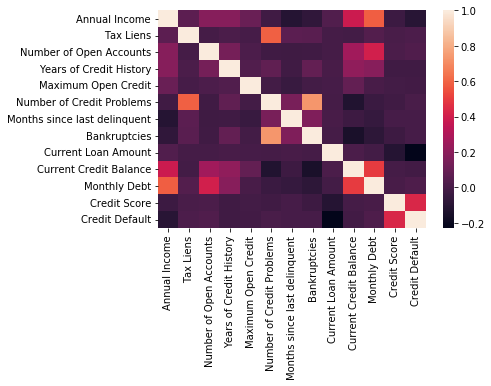

In [630]:
numerical_data_train_big=data_train.drop(columns=["Home Ownership","Purpose","Term"])
#print(numerical_data_train)
sns.heatmap(numerical_data_train_big.corr())

## Preprocessing

In [631]:
data_train.shape

(6750, 17)

In [632]:
# 'Annual Income','Months since last delinquent','Credit Score','Years in current job' колонки имеют большое количество NaN
#data_train=data_train.drop(['Annual Income','Months since last delinquent','Credit Score','Years in current job'], axis=1)
#data_train=data_train.drop(['Annual Income','Credit Score','Years in current job'], axis=1)
#data_train['Bankruptcies']=data_train['Bankruptcies'].interpolate()

#После многочисленных экспериментов, наилучшие модели получились с регрессором Credit Score и 3 категориальными переменными
data_train=data_train[['Home Ownership', 'Purpose', 'Term', 'Credit Score','Credit Default']]
data_train=data_train.dropna()

In [633]:
# Check NAs again
d={}
for elem in data_train.columns:
    d[elem]=data_train[elem].isna().sum()
print(d)

{'Home Ownership': 0, 'Purpose': 0, 'Term': 0, 'Credit Score': 0, 'Credit Default': 0}


In [634]:
data_train.shape

(5350, 5)

In [635]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 1 to 6748
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Home Ownership  5350 non-null   object 
 1   Purpose         5350 non-null   object 
 2   Term            5350 non-null   object 
 3   Credit Score    5350 non-null   float64
 4   Credit Default  5350 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 250.8+ KB
None


In [636]:
#We also have two additional categories in Purpose Category that is not included in data_test
data_train["Purpose"]=data_train["Purpose"].replace(to_replace="educational expenses",value="other")
data_train["Purpose"]=data_train["Purpose"].replace(to_replace="renewable energy",value="other")

## Numerical plots

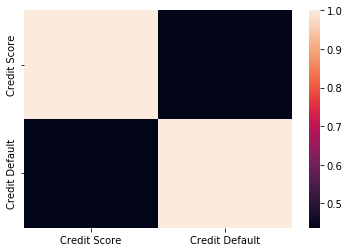

In [637]:
#Correlation analysis 
numerical_data_train=data_train.drop(columns=["Home Ownership","Purpose","Term"])
#print(numerical_data_train)
sns.heatmap(numerical_data_train.corr())
#not many columns have a high correlation with the dependent variable, but if we drop most of them, we won't have much data

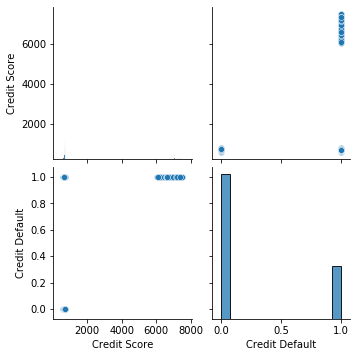

In [638]:
#Pairplots for numerical data
sns.pairplot(numerical_data_train)

## Categorical plots

In [641]:
#Categorical plots - Home Ownership vs Purpose
pd.crosstab(data_train["Home Ownership"], data_train["Purpose"])

Purpose         business loan  buy a car  buy house  debt consolidation  \
Home Ownership                                                            
Have Mortgage               0          0          0                   0   
Home Mortgage              43         28          9                2068   
Own Home                    9         10          2                 345   
Rent                       44         30         14                1830   

Purpose         home improvements  major purchase  medical bills  moving  \
Home Ownership                                                             
Have Mortgage                   0               0              0       0   
Home Mortgage                 230              14             26       0   
Own Home                       29               3              7       1   
Rent                           27              12             18       8   

Purpose         other  small business  take a trip  vacation  wedding  
Home Ownership                                                         
Have Mortgage       0               0            6         0        0  
Home Mortgage     181               9            0         1        3  
Own Home           47               3            2         2        2  
Rent              256               7           17         2        5

In [643]:
#Categorical plots - Home Ownership vs Term
pd.crosstab(data_train["Home Ownership"], data_train["Term"])

Term            Long Term  Short Term
Home Ownership                       
Have Mortgage           0           6
Home Mortgage         815        1797
Own Home              132         330
Rent                  480        1790

In [644]:
#Categorical plots - Purpose vs Term
pd.crosstab(data_train["Purpose"], data_train["Term"])

Term                Long Term  Short Term
Purpose                                  
business loan              29          67
buy a car                  17          51
buy house                   8          17
debt consolidation       1148        3095
home improvements          84         202
major purchase              9          20
medical bills              12          39
moving                      1           8
other                     106         378
small business              6          13
take a trip                 3          22
vacation                    1           4
wedding                     3           7

## Dummy variables conversion

In [645]:
data_train_new=pd.get_dummies(data_train, columns=["Home Ownership","Purpose","Term"])

In [646]:
y_train=data_train_new["Credit Default"]
X_train=data_train_new.drop(["Credit Default"],axis=1)

In [647]:
y_train.shape, X_train.shape

((5350,), (5350, 20))

In [648]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 1 to 6748
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Score                  5350 non-null   float64
 1   Home Ownership_Have Mortgage  5350 non-null   uint8  
 2   Home Ownership_Home Mortgage  5350 non-null   uint8  
 3   Home Ownership_Own Home       5350 non-null   uint8  
 4   Home Ownership_Rent           5350 non-null   uint8  
 5   Purpose_business loan         5350 non-null   uint8  
 6   Purpose_buy a car             5350 non-null   uint8  
 7   Purpose_buy house             5350 non-null   uint8  
 8   Purpose_debt consolidation    5350 non-null   uint8  
 9   Purpose_home improvements     5350 non-null   uint8  
 10  Purpose_major purchase        5350 non-null   uint8  
 11  Purpose_medical bills         5350 non-null   uint8  
 12  Purpose_moving                5350 non-null   uint8  
 13  Pur

# Test data

In [649]:
data_test=pd.read_csv("test_data.csv")

In [650]:
#data_test_new=data_test.drop(['Annual Income','Months since last delinquent','Credit Score','Years in current job'], axis=1)
data_test_new=data_test[['Home Ownership', 'Purpose', 'Term', 'Credit Score','Credit Default']]
data_test_new["Credit Score"]=data_test_new["Credit Score"].interpolate()

C:\Users\AERC\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [651]:
# Check NAs 
d3={}
for elem in data_test_new.columns:
    d3[elem]=data_test_new[elem].isna().sum()
print(d3)

{'Home Ownership': 0, 'Purpose': 0, 'Term': 0, 'Credit Score': 0, 'Credit Default': 0}


In [652]:
#We can't delete X_test rows by the task
#We could use interpolation for continious data
for elem in data_test_new.columns:
    data_test_new[elem]=data_test_new[elem].interpolate()

C:\Users\AERC\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [601]:
# We could use ffill for categorical data (forward fill for NaN) 
#for elem in data_test_new.columns:
    #data_test_new[elem]=data_test_new[elem].ffill()

In [653]:
# Check NAs 
d4={}
for elem in data_test_new.columns:
    d4[elem]=data_test_new[elem].isna().sum()
print(d4)

{'Home Ownership': 0, 'Purpose': 0, 'Term': 0, 'Credit Score': 0, 'Credit Default': 0}


In [654]:
data_test_new.shape

(750, 5)

In [655]:
data_test_new_dummies=pd.get_dummies(data_test_new, columns=["Home Ownership","Purpose","Term"])

In [656]:
data_test_new_dummies.shape

(750, 21)

In [377]:
#print(data_test_new_dummies.info())

In [657]:
y_test=data_test_new_dummies["Credit Default"]
X_test=data_test_new_dummies.drop(["Credit Default"],axis=1)

In [607]:
#y_test.sum()

In [658]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Score                  750 non-null    float64
 1   Home Ownership_Have Mortgage  750 non-null    uint8  
 2   Home Ownership_Home Mortgage  750 non-null    uint8  
 3   Home Ownership_Own Home       750 non-null    uint8  
 4   Home Ownership_Rent           750 non-null    uint8  
 5   Purpose_business loan         750 non-null    uint8  
 6   Purpose_buy a car             750 non-null    uint8  
 7   Purpose_buy house             750 non-null    uint8  
 8   Purpose_debt consolidation    750 non-null    uint8  
 9   Purpose_home improvements     750 non-null    uint8  
 10  Purpose_major purchase        750 non-null    uint8  
 11  Purpose_medical bills         750 non-null    uint8  
 12  Purpose_moving                750 non-null    uint8  
 13  Purpo

In [659]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Logistic Regression

In [660]:
from sklearn.linear_model import LogisticRegression

In [661]:
logistic_regr=LogisticRegression()

In [662]:
logistic_regr.fit(X_train,y_train)

LogisticRegression()

In [663]:
y_pred_logistic=logistic_regr.predict(X_test)

In [664]:
#Why doesn't work ???
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
score_logistic = f1_score(y_test, y_pred_logistic)
print(precision_logistic, recall_logistic, score_logistic)

0.7536231884057971 0.2765957446808511 0.4046692607003891


# KNN

In [665]:
from sklearn.neighbors import KNeighborsClassifier

In [666]:
metrics_d={"nb":0,"precision":0,"recall":0,"f_score":0}
for elem in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=elem)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    precision, recall, f_score  = precision_score(y_test, y_pred), recall_score(y_test, y_pred),f1_score(y_test, y_pred)
    if precision>metrics_d["precision"] and recall>metrics_d["recall"] and f_score>metrics_d["f_score"]:
        metrics_d["nb"],metrics_d["precision"],metrics_d["recall"],metrics_d["f_score"]=elem, precision, recall, f_score
print(metrics_d)

{'nb': 1, 'precision': 0.3574660633484163, 'recall': 0.42021276595744683, 'f_score': 0.38630806845965765}


In [617]:
#y_pred

# SVC

In [667]:
from sklearn.svm import SVC

In [668]:
svc_model=SVC()

In [669]:
svc_model.fit(X_train,y_train)

SVC()

In [670]:
y_pred_svc=svc_model.predict(X_test)

In [671]:
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
score_svc = f1_score(y_test, y_pred_svc)

In [672]:
print(f" Precision_svc = {precision_svc}", f" Recall_svc = {recall_svc}", f" Score_logistic = {score_svc}")

 Precision_svc = 0.7936507936507936  Recall_svc = 0.26595744680851063  Score_logistic = 0.398406374501992


# Random Forest Classifier

In [680]:
from sklearn.ensemble import RandomForestClassifier

In [681]:
rf=RandomForestClassifier()

In [682]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [683]:
y_pred_rf=rf.predict(X_test)

In [684]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
score_rf = f1_score(y_test, y_pred_rf)

In [685]:
print(f" Precision_rf = {precision_rf}", f" Recall_rf = {recall_rf}", f" Score_rf = {score_rf}")

 Precision_rf = 0.4825174825174825  Recall_rf = 0.3670212765957447  Score_rf = 0.4169184290030211


# Decision Tree Classifier

In [698]:
from sklearn.tree import DecisionTreeClassifier

In [699]:
tree=DecisionTreeClassifier()

In [700]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [701]:
y_pred_tree=tree.predict(X_test)

In [702]:
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
score_tree = f1_score(y_test, y_pred_tree)

In [703]:
print(f" Precision_decision_tree = {precision_tree}", f" Recall_decision_tree = {recall_tree}", f" Score_decision_tree = {score_tree}")

 Precision_decision_tree = 0.4806201550387597  Recall_decision_tree = 0.32978723404255317  Score_decision_tree = 0.3911671924290221


# Gradient Boosting Classifier

In [713]:
from sklearn.ensemble import GradientBoostingClassifier

In [714]:
gb=GradientBoostingClassifier()

In [715]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [716]:
y_pred_gb=gb.predict(X_test)

In [717]:
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
score_gb = f1_score(y_test, y_pred_gb)

In [718]:
print(f" Precision_gb = {precision_gb}", f" Recall_gb = {recall_gb}", f" Score_gb = {score_gb}")

 Precision_gb = 0.7222222222222222  Recall_gb = 0.2765957446808511  Score_gb = 0.4
